In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
confirmed = pd.read_csv("covid_19_confirmed_v1_lyst1747728690432.csv")
deaths = pd.read_csv("covid_19_deaths_v1_lyst1747728711771.csv", skiprows=1)
recovery = pd.read_csv("covid_19_recovered_v1_lyst1747728719904.csv", skiprows=1)

In [4]:
for df in [confirmed, deaths, recovery]:
    df['Province/State'] = df['Province/State'].fillna('All Provinces')  # Replace NaNs
    df['Province/State'] = df['Province/State'].replace('', 'All Provinces')  # Replace blank strings
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,All Provinces,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,All Provinces,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,All Provinces,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
3,All Provinces,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
4,All Provinces,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180


In [5]:
for df in [confirmed, deaths, recovery]:
    time_series_columns = df.columns[4:]
    # missing_summary = df[time_series_columns].isnull().sum()
    df[time_series_columns] = df[time_series_columns].ffill(axis=1)

In [11]:
def melt_data(df, value_name):
    id_vars = ['Province/State', 'Country/Region', 'Lat', 'Long']
    df_melted = df.melt(id_vars=id_vars, var_name='Date', value_name=value_name)
    df_melted['Date'] = pd.to_datetime(df_melted['Date'])
    return df_melted

confirmed_long = melt_data(confirmed, 'Confirmed')
deaths_long = melt_data(deaths, 'Deaths')
recovered_long = melt_data(recovery, 'Recovered')
merged_df = confirmed_long.merge(deaths_long, on=['Province/State', 'Country/Region', 'Lat', 'Long', 'Date'])
merged_df = merged_df.merge(recovered_long, on=['Province/State', 'Country/Region', 'Lat', 'Long', 'Date'])
merged_df
# merged_df.head(100)

C:\Users\adity\AppData\Local\Temp\ipykernel_19960\1008922987.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_melted['Date'] = pd.to_datetime(df_melted['Date'])
C:\Users\adity\AppData\Local\Temp\ipykernel_19960\1008922987.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_melted['Date'] = pd.to_datetime(df_melted['Date'])
C:\Users\adity\AppData\Local\Temp\ipykernel_19960\1008922987.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_melted['Date'] = pd.to_datetime(df_melted['Date'])


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,All Provinces,Afghanistan,33.939110,67.709953,2020-01-22,0,0.0,0.0
1,All Provinces,Albania,41.153300,20.168300,2020-01-22,0,0.0,0.0
2,All Provinces,Algeria,28.033900,1.659600,2020-01-22,0,0.0,0.0
3,All Provinces,Andorra,42.506300,1.521800,2020-01-22,0,0.0,0.0
4,All Provinces,Angola,-11.202700,17.873900,2020-01-22,0,0.0,0.0
...,...,...,...,...,...,...,...,...
125965,All Provinces,Vietnam,14.058324,108.277199,2021-05-29,6908,47.0,2896.0
125966,All Provinces,West Bank and Gaza,31.952200,35.233200,2021-05-29,307838,3492.0,300524.0
125967,All Provinces,Yemen,15.552727,48.516388,2021-05-29,6731,1319.0,3399.0
125968,All Provinces,Zambia,-13.133897,27.849332,2021-05-29,94751,1276.0,91594.0


Analyze the monthly sum of confirmed cases, deaths, and recoveries for countries to understand the progression of the pandemic.[From the merged dataset]

In [17]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df['YearMonth'] = merged_df['Date'].dt.to_period('M')
monthly_summary = merged_df.groupby(['Country/Region', 'YearMonth'])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
monthly_summary['YearMonth'] = monthly_summary['YearMonth'].astype(str)
monthly_summary

,Country/Region,YearMonth,Confirmed,Deaths,Recovered
0,Afghanistan,2020-01,0,0.0,0.0
1,Afghanistan,2020-02,6,0.0,0.0
2,Afghanistan,2020-03,1164,27.0,26.0
3,Afghanistan,2020-04,27074,890.0,2927.0
4,Afghanistan,2020-05,225674,5007.0,24129.0
...,...,...,...,...,...
3208,Zimbabwe,2021-01,787416,23012.0,531530.0
3209,Zimbabwe,2021-02,984049,38753.0,849842.0
3210,Zimbabwe,2021-03,1132264,46556.0,1056857.0
3211,Zimbabwe,2021-04,1126565,46375.0,1050250.0


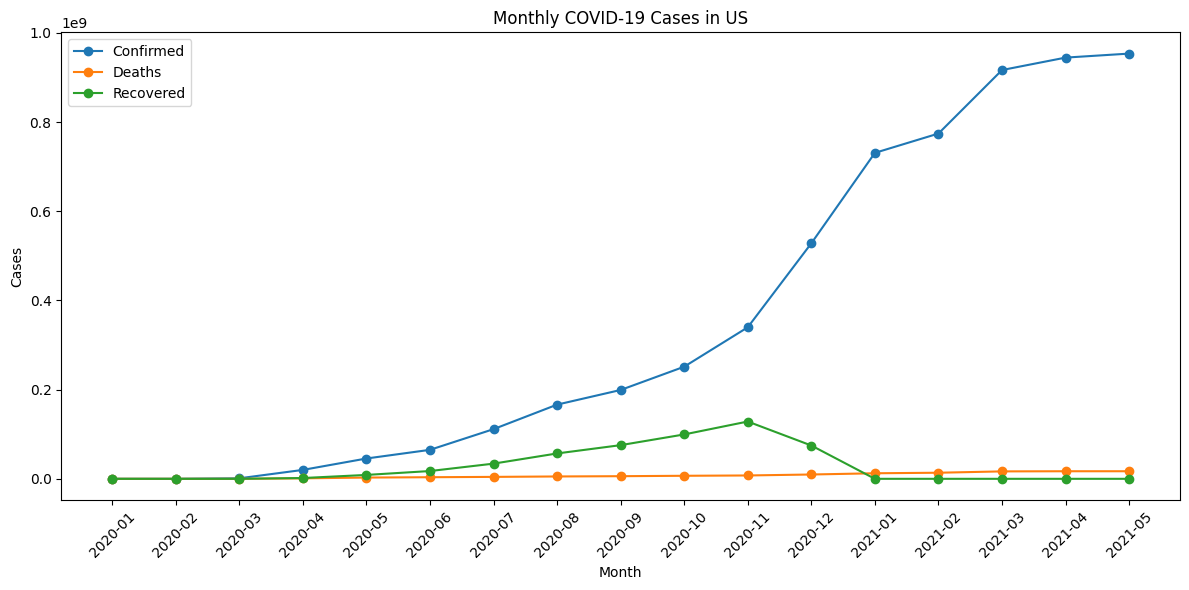

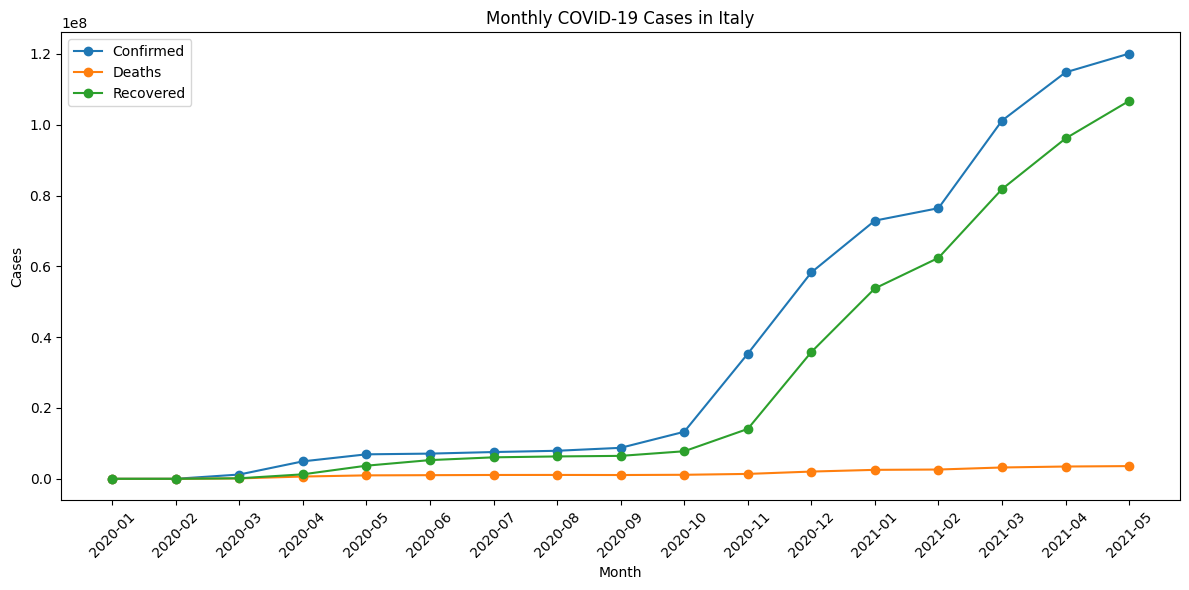

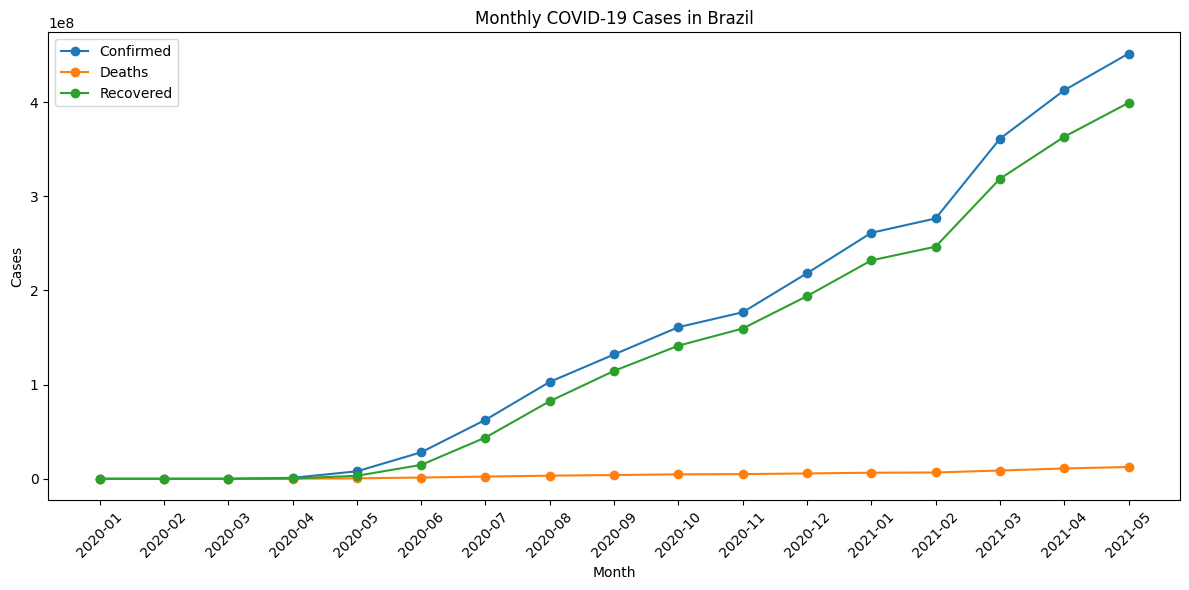

In [ ]:
countries = ["US","Italy","Brazil"]
for country in countries:
    country_data = monthly_summary[monthly_summary['Country/Region'] == country]
    plt.figure(figsize=(12, 6))
    plt.plot(country_data['YearMonth'], country_data['Confirmed'], label='Confirmed', marker='o')
    plt.plot(country_data['YearMonth'], country_data['Deaths'],     label='Deaths', marker='o')
    plt.plot(country_data['YearMonth'], country_data['Recovered'], label='Recovered', marker='o')
    plt.title(f"Monthly COVID-19 Cases in {country}")
    plt.xlabel("Month")
    plt.ylabel("Cases")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


Question 8: Combined Data Analysis
Q8.1: For the combined dataset, identify the three countries with the highest average death rates (deaths/confirmed cases) throughout 2020. What might this indicate about the pandemic's impact in these countries?

In [23]:
data_2020 = merged_df[(merged_df['Date'].dt.year == 2020)]
daily_country = data_2020.groupby(['Country/Region', 'Date'])[['Confirmed', 'Deaths']].sum().reset_index()
daily_country['DeathRate'] = daily_country.apply(
    lambda row: row['Deaths'] / row['Confirmed'] if row['Confirmed'] > 0 else 0, axis=1
)
avg_death_rates = daily_country.groupby('Country/Region')['DeathRate'].mean().reset_index()
top_3_death_rate_countries = avg_death_rates.sort_values(by='DeathRate', ascending=False).head(3)
top_3_death_rate_countries

,Country/Region,DeathRate
186,Yemen,0.192393
104,MS Zaandam,0.177134
84,Italy,0.094642


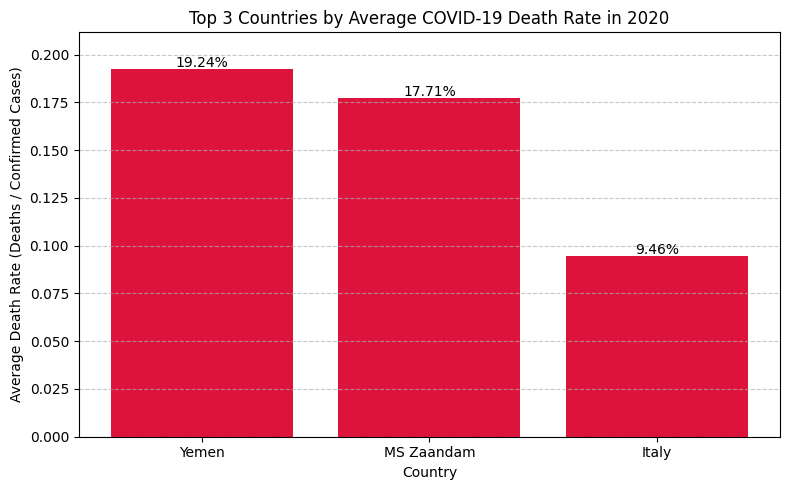

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(top_3_death_rate_countries['Country/Region'], top_3_death_rate_countries['DeathRate'], color='crimson')
plt.title('Top 3 Countries by Average COVID-19 Death Rate in 2020')
plt.xlabel('Country')
plt.ylabel('Average Death Rate (Deaths / Confirmed Cases)')
plt.ylim(0, top_3_death_rate_countries['DeathRate'].max() * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Using the merged dataset, compare the total number of recoveries to the total number of deaths in South Africa. What can this tell us about the outcomes of COVID-19 cases in the country?

In [27]:
sa_data = merged_df[merged_df['Country/Region'] == 'South Africa']
sa_summary = sa_data.groupby('Date')[['Recovered', 'Deaths']].sum().reset_index()
total_recovered = sa_summary['Recovered'].max()
total_deaths = sa_summary['Deaths'].max()
print(f"Total Recoveries in South Africa: {int(total_recovered):,}")
print(f"Total Deaths in South Africa: {int(total_deaths):,}")
if total_deaths > 0:
    ratio = total_recovered / total_deaths
    print(f"Recovery-to-Death Ratio: {ratio:.2f}")
else:
    print("No recorded deaths to calculate a ratio.")

Total Recoveries in South Africa: 1,554,184
Total Deaths in South Africa: 56,363
Recovery-to-Death Ratio: 27.57


Analyze the ratio of recoveries to confirmed cases for the United States monthly from March 2020 to May 2021. Which month experienced the highest recovery ratio, and what could be the potential reasons?

In [31]:
us_data = merged_df[
    (merged_df['Country/Region'] == 'US') &
    (merged_df['Date'] >= '2020-03-01') &
    (merged_df['Date'] <= '2021-05-31')
]
us_data['YearMonth'] = us_data['Date'].dt.to_period('M')
monthly_us = us_data.groupby('YearMonth')[['Confirmed', 'Recovered']].sum().reset_index()
monthly_us['RecoveryRatio'] = monthly_us.apply(
    lambda row: row['Recovered'] / row['Confirmed'] if row['Confirmed'] > 0 else 0,
    axis=1
)
monthly_us['YearMonth'] = monthly_us['YearMonth'].astype(str)
max_recovery_month = monthly_us.loc[monthly_us['RecoveryRatio'].idxmax()]
print(monthly_us[['YearMonth', 'RecoveryRatio']])
print("\nMonth with highest recovery ratio:")
print(f"{max_recovery_month['YearMonth']} : {max_recovery_month['RecoveryRatio']:.2%}")

   YearMonth  RecoveryRatio
0    2020-03       0.017614
1    2020-04       0.087577
2    2020-05       0.191507
3    2020-06       0.268365
4    2020-07       0.305540
5    2020-08       0.341899
6    2020-09       0.378911
7    2020-10       0.395799
8    2020-11       0.378082
9    2020-12       0.141402
10   2021-01       0.000000
11   2021-02       0.000000
12   2021-03       0.000000
13   2021-04       0.000000
14   2021-05       0.000000

Month with highest recovery ratio:
2020-10 : 39.58%


C:\Users\adity\AppData\Local\Temp\ipykernel_19960\1094380272.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_data['YearMonth'] = us_data['Date'].dt.to_period('M')
